In [315]:
'''
Description:

This project takes a dataset that provides details about sonar signals.  Rows are either classified as a rock or a mine.  A rock has a value
of 0, while a mine has a value of 1.  The basis is  to use the dataset to build SVM (with and without kernel) and Decision Trees models 
with the intent of high accuracy scores.

The dataset was taken from the UCI Machine Learning Repository.
'''
import pandas as pd

def load_data():
    return pd.read_csv('sonar.csv', header=0)

In [317]:
# Print out some data points
data = load_data()
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,Classification
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


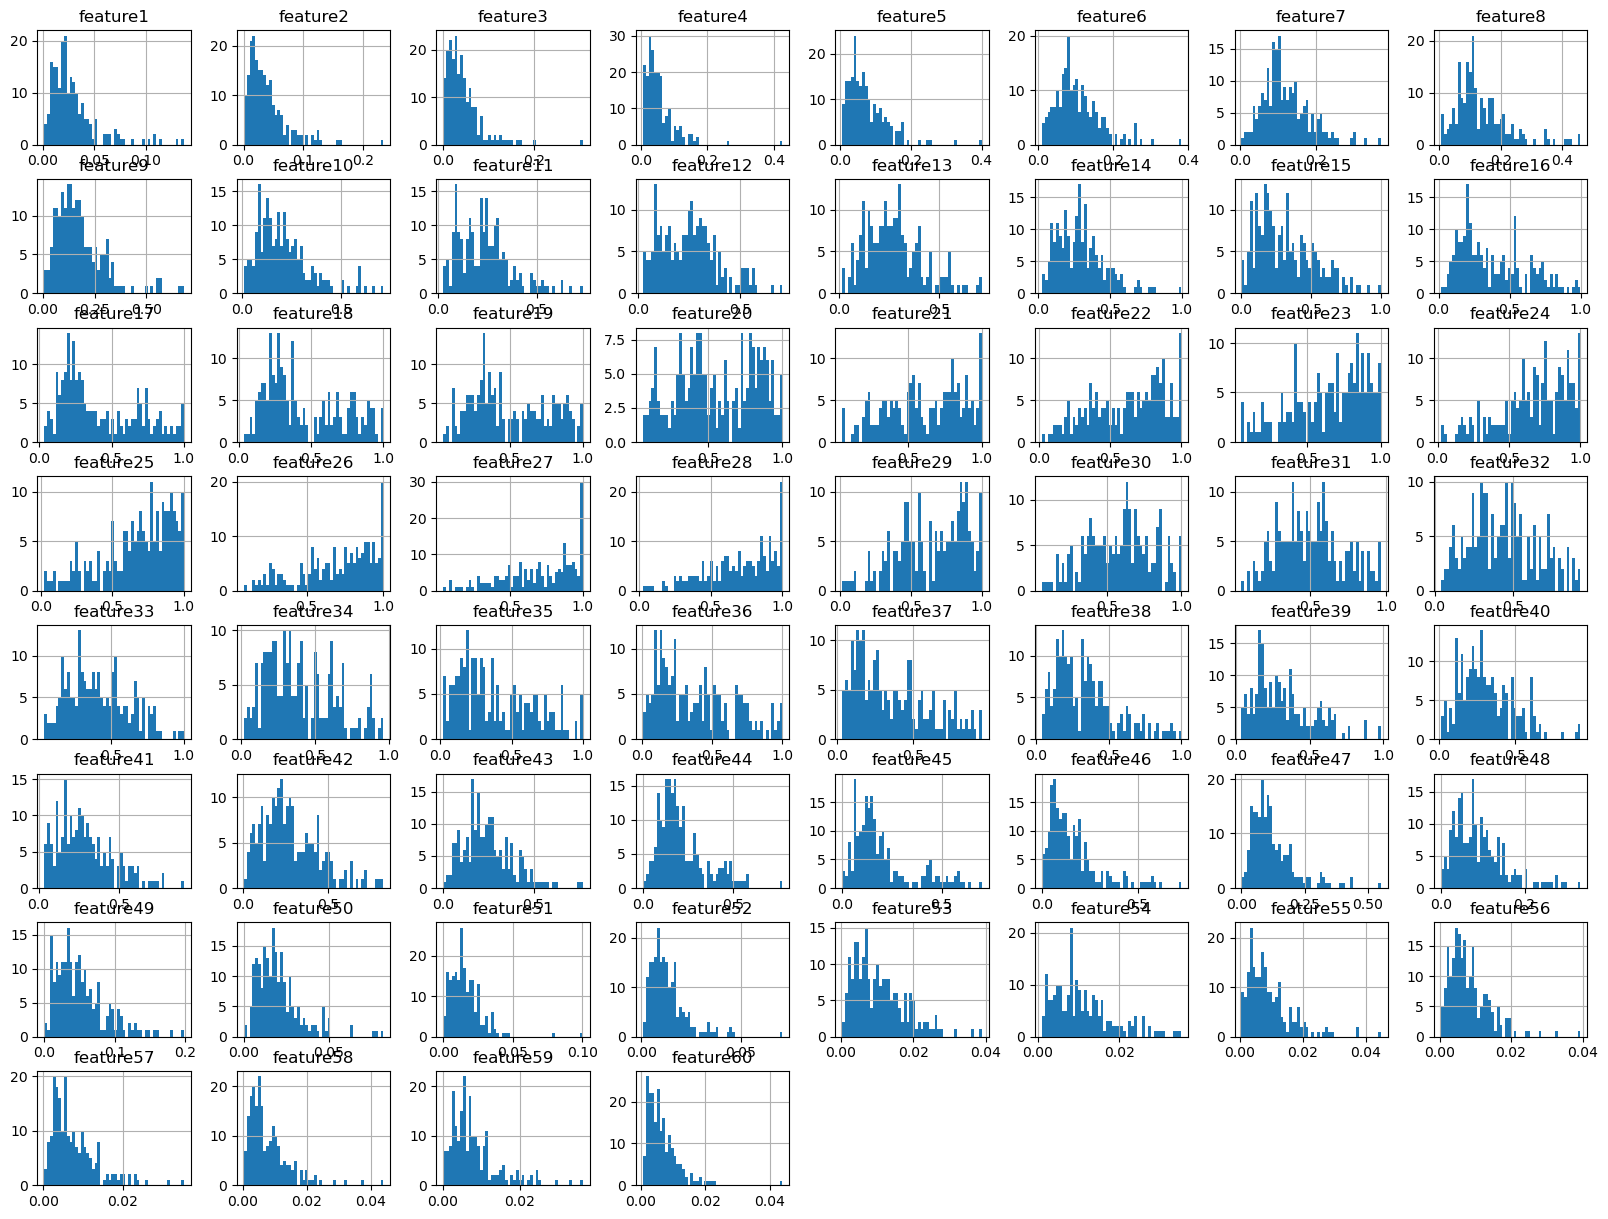

In [319]:
# Visualizing the dataset
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [320]:
#Data preparation
#Map the diagnosis values to integers
classification_mapping = {
    'R': 0,
    'M': 1
}
data['Classification'] = data['Classification'].map(classification_mapping)

data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,Classification
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [321]:
#Removing Classification Column so it is not scaled
from sklearn.preprocessing import StandardScaler

classification = data['Classification']
features = data.drop(columns=['Classification'])

#Scaling features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_df = pd.DataFrame(features_scaled, columns=features.columns)
features_df['Classification'] = classification

features_df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,Classification
0,-0.399551,-0.040648,-0.026926,-0.715105,0.364456,-0.101253,0.521638,0.297843,1.125272,0.021186,...,-1.115432,-0.597604,0.680897,-0.295646,1.481635,1.763784,0.069870,0.171678,-0.658947,0
1,0.703538,0.421630,1.055618,0.323330,0.777676,2.607217,1.522625,2.510982,1.318325,0.588706,...,-0.522349,-0.256857,-0.843151,0.015503,1.901046,1.070732,-0.472406,-0.444554,-0.419852,0
2,-0.129229,0.601067,1.723404,1.172176,0.400545,2.093337,1.968770,2.852370,3.232767,3.066105,...,1.017585,0.836373,-0.197833,1.231812,2.827246,4.120162,1.309360,0.252761,0.257582,0
3,-0.835555,-0.648910,0.481740,-0.719414,-0.987079,-1.149364,-0.193816,-0.084747,-1.000852,-0.610469,...,-0.137365,-1.009341,0.557326,-0.111785,-0.161060,-0.488635,-0.549875,-0.639154,1.034640,0
4,2.050790,0.856537,0.111327,-0.312227,-0.292365,-0.672796,-0.013735,1.317299,1.510531,1.772220,...,-1.073812,-0.753780,-0.060532,0.241793,-1.174638,-0.107456,-0.487900,0.447361,0.576375,0


In [322]:
#This cell prepares the data for training
data_train = features_df.drop(columns=['Classification'], inplace=True)

In [323]:
#This cell splits the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_df, classification, test_size=0.2, random_state=42)

In [324]:
#This cell handles the no kernel (linear) SVM accuracy score for the dataset
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8333333333333334

In [325]:
#This cell handles the kernel (gaussian) SVM accuracy score for the dataset
svm_poly_model = SVC(kernel='rbf', random_state=42)
svm_poly_model.fit(X_train, y_train)

y_pred = svm_poly_model.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred)
accuracy2

0.9047619047619048

In [326]:
#This cell handles the decision tree accuracy score for the dataset
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy3 = accuracy_score(y_test, y_pred)
accuracy3

0.7142857142857143

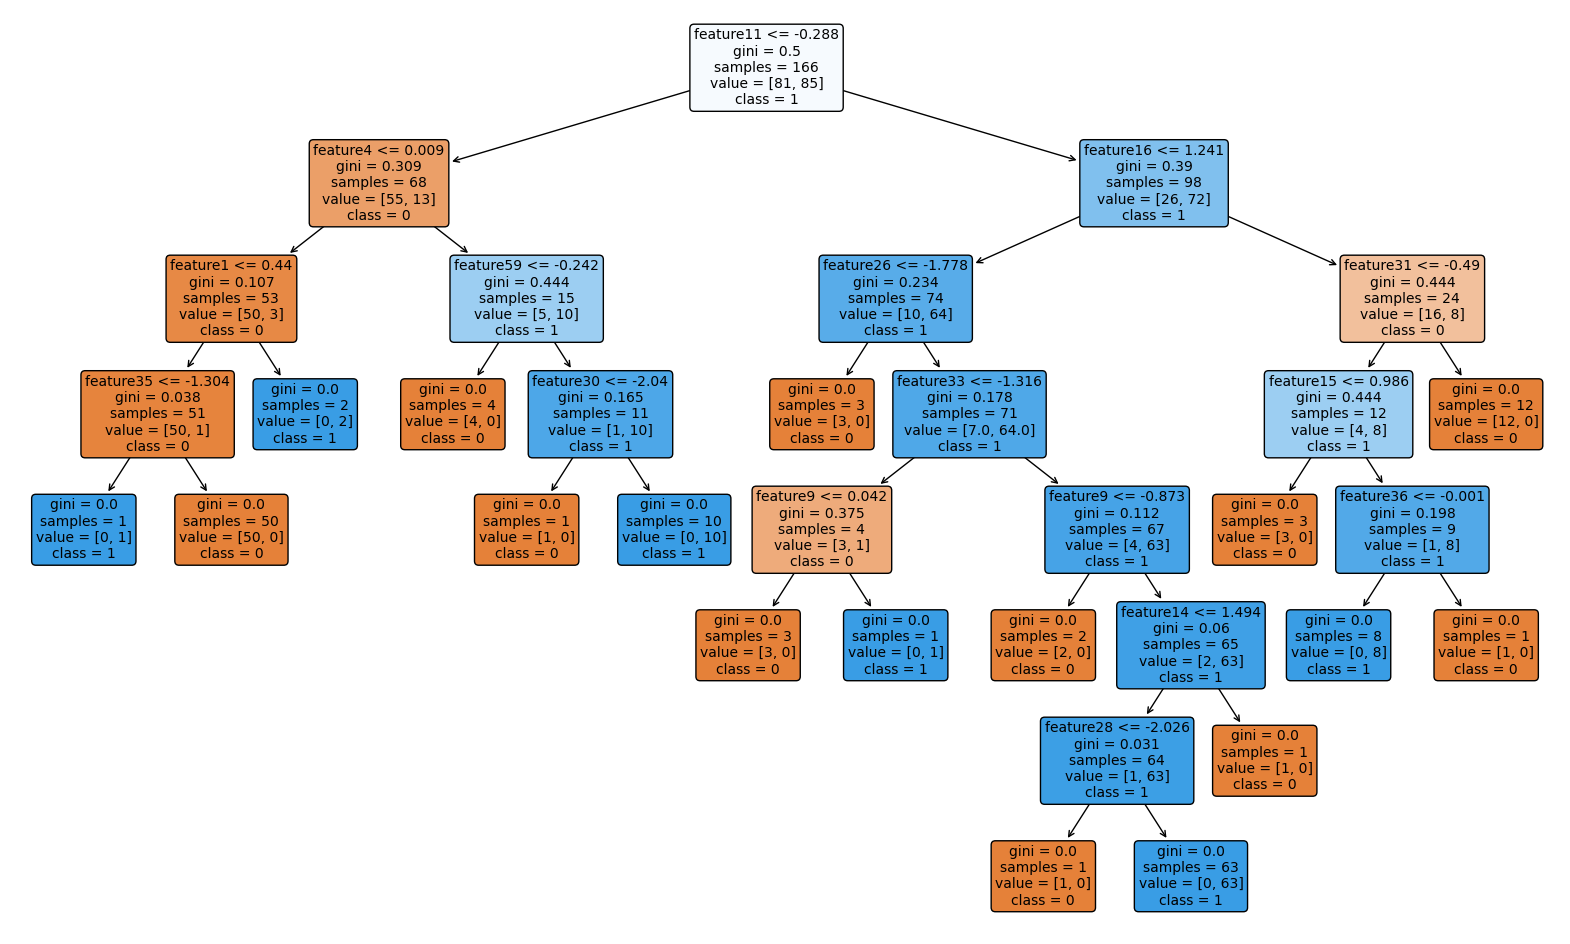

In [327]:
#This cell handles the visualization of the decision tree
from sklearn.tree import plot_tree

features = features_df.columns.tolist()

plt.figure(figsize=(20, 12))
plot_tree(dt_model, 
          feature_names=features,
          class_names=['0', '1'],
          filled=True,    
          rounded=True,
          fontsize=10)
plt.show()

In [ ]:
'''
Baed on the tests run, it appears that the gaussian SVM model is the most accurate (90.48%).  
The linear SVM is the next most accurate, with a reading of 83.33%.  Finally, the decision
tree is the least accurate model with a score of 71.43%.
'''